In [1]:
import serial
import serial.tools
import serial.tools.list_ports

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm

# Serial Setup

In [2]:
ports = serial.tools.list_ports.comports()
for port in ports:
    print(f"Port: '{port.device}' - {port.description}")

Port: '/dev/cu.debug-console' - n/a
Port: '/dev/cu.ZihuiAndysPowerbeatsPro' - n/a
Port: '/dev/cu.Bluetooth-Incoming-Port' - n/a
Port: '/dev/cu.usbmodem21101' - IOUSBHostDevice


In [3]:
ser = serial.Serial('/dev/cu.usbmodem21101', 9600, timeout=None)

In [5]:
def get_accelerometer_data():
    ser.reset_input_buffer()
    while True:
        try:
            data = ser.readline().decode('utf-8').strip()
            data_splitted = list(map(int, data.split(',')))
            
            if len(data_splitted) == 3:
                break
        except:
            pass
    return np.array(data_splitted)

# Vector Operations

In [9]:
def get_magnitude(vec):
    return np.sqrt(np.dot(vec, vec))

In [10]:
def get_unit_vector(vec):
    return vec / get_magnitude(vec)

In [11]:
def get_angle_btwn_vecs(vec1, vec2):
    vec1_h = get_unit_vector(vec1)
    vec2_h = get_unit_vector(vec2)
    
    return np.arccos(np.dot(vec1_h, vec2_h))

def to_degree(radian):
    return 180 * radian / np.pi

In [12]:
def projection(from_, to):
    to_h = get_unit_vector(to)
    return np.dot(from_, to_h) * to_h

In [13]:
def gram_schmidt(datum, vec):
    return get_unit_vector(vec - projection(vec, datum))

# Vector Visualization

In [17]:
arr = []
for i in range(20):
    entry = get_unit_vector(get_accelerometer_data())
    print(entry)
    arr.append(entry)
    
arr = np.array(arr)

[ 0.05348342 -0.00558343  0.99855313]
[ 0.06027247 -0.00470419  0.99817088]
[ 0.05243128 -0.01318105  0.99853754]
[ 0.11766651 -0.00905127  0.99301192]
[-0.10201022  0.29018162  0.95151907]
[-0.50227221  0.19743315  0.84186862]
[-0.67045029 -0.18870864  0.7175552 ]
[-0.23763579 -0.45820197  0.85649295]
[ 0.45636364 -0.4731457   0.75356843]
[ 0.81033487 -0.28441524  0.51231375]
[0.79244466 0.19086004 0.5793133 ]
[0.03714999 0.62126213 0.78272169]
[-0.49326348  0.67662026  0.54669567]
[-0.71830939  0.57225757  0.39566765]
[-0.86298957  0.34189276  0.37196551]
[-0.63869799 -0.34191169  0.68931943]
[-0.08824954 -0.55742431  0.82552417]
[ 0.5801977  -0.40610999  0.70600659]
[0.11230995 0.48287719 0.86845616]
[ 0.06357763 -0.11711669  0.99108101]


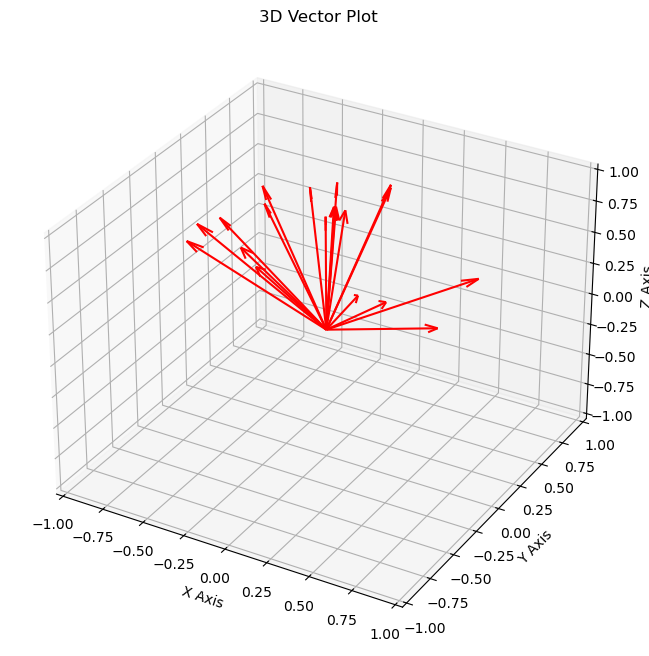

In [18]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

# Plot the vector
for x, y, z in arr:
    ax.quiver(0, 0, 0, x, y, z, color='r', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

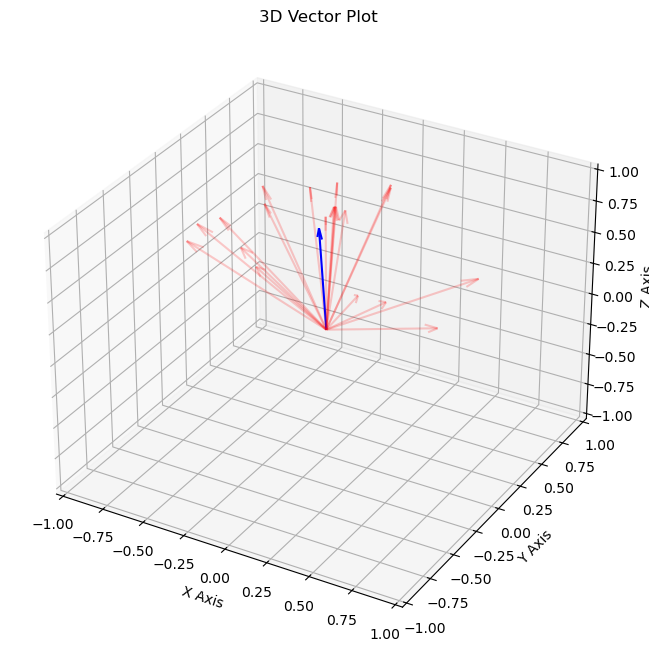

In [19]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

# Plot the vector
for x, y, z in arr:
    ax.quiver(0, 0, 0, x, y, z, color='r', arrow_length_ratio=0.1, alpha=0.2)

mean_vec = np.mean(arr, axis=0)
ax.quiver(0, 0, 0, *mean_vec, color='b', arrow_length_ratio=0.1)


# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

# 1 vector datum approach

## Sample the datum

In [20]:
datum_1_arr = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    datum_1_arr.append(entry)
    
datum_1_arr = np.array(datum_1_arr)

100%|██████████| 20/20 [00:07<00:00,  2.68it/s]


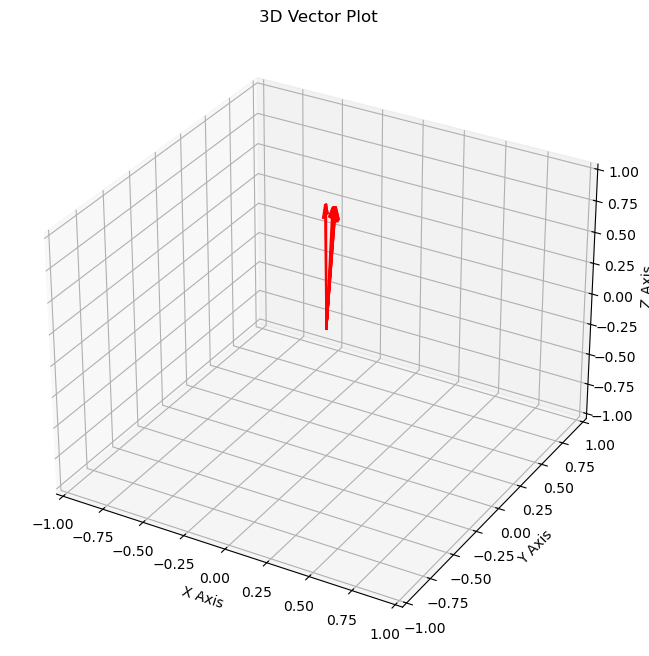

In [21]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

# Plot the vector
for x, y, z in datum_1_arr:
    ax.quiver(0, 0, 0, x, y, z, color='r', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [22]:
datum_1 = np.mean(datum_1_arr, axis=0)
datum_1

array([ 0.04837444, -0.01354468,  0.99850373])

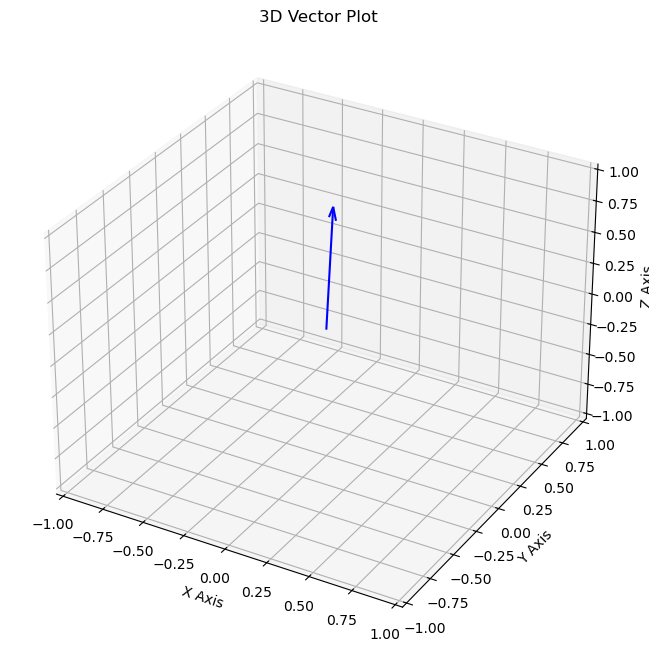

In [23]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='b', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Get another measurement

In [30]:
vec = []
for i in tqdm(range(5)):
    entry = get_unit_vector(get_accelerometer_data())
    vec.append(entry)
    
vec = get_unit_vector(np.mean(np.array(vec), axis=0))
vec

100%|██████████| 5/5 [00:02<00:00,  2.39it/s]


array([ 0.05483545, -0.46195138,  0.88520845])

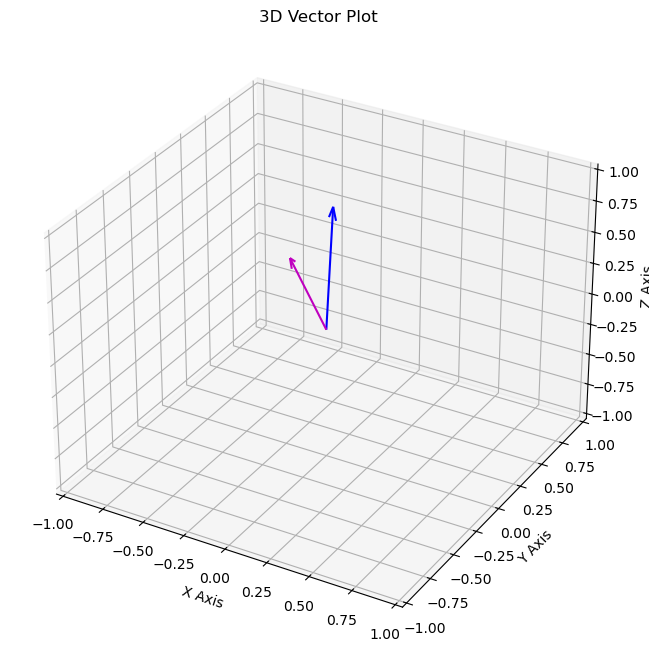

In [31]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *vec, color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [32]:
to_degree(get_angle_btwn_vecs(datum_1, vec))

26.747066066713174

100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


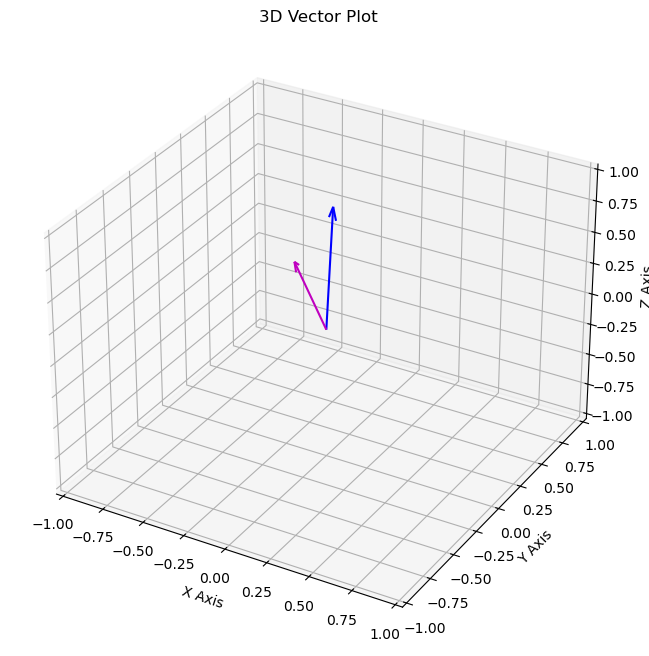

27.648667811724568


In [33]:
vec = []
for i in tqdm(range(5)):
    entry = get_unit_vector(get_accelerometer_data())
    vec.append(entry)
    
vec = np.mean(np.array(vec), axis=0)
vec
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *vec, color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()
print(to_degree(get_angle_btwn_vecs(datum_1, vec)))

In [35]:
for i in range(20):
    vec = get_unit_vector(get_accelerometer_data())
    print(f"{vec}\t angle = {to_degree(get_angle_btwn_vecs(datum_1, vec))}")

[-0.03599229 -0.1670642   0.98528885]	 angle = 10.07941681901691
[ 0.00378064 -0.14540923  0.98936437]	 angle = 8.000209568079242
[-0.01111133 -0.14415483  0.98949276]	 angle = 8.247266251815562
[ 0.04013688 -0.13713434  0.98973896]	 angle = 7.1200210511511415
[ 0.20559519 -0.0733608   0.97588361]	 angle = 9.737607991778438
[0.06926529 0.03378794 0.99702592]	 angle = 2.966216800042379
[-0.44073125  0.10638341  0.89131282]	 angle = 29.839736523763012
[-0.71494278  0.06743112  0.69592375]	 angle = 48.73534401910018
[-0.64355171  0.15037556  0.75048544]	 angle = 44.245111924695365
[-0.68714916  0.10204896  0.71931359]	 angle = 46.86071703095463
[-0.63000064  0.05850418  0.77438779]	 angle = 42.0864840311219
[-0.60296825  0.08110923  0.79363126]	 angle = 40.32776024778748
[-0.62735055  0.15994691  0.76213402]	 angle = 43.22669744346939
[-0.13634583  0.03478783  0.99005031]	 angle = 10.96871375014
[-0.12725086  0.04518121  0.99084099]	 angle = 10.635815145044415
[ 0.04737209 -0.38683113  0.

# 2 Data Approach

In [36]:
datum_1_arr = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    datum_1_arr.append(entry)
    
datum_1 = get_unit_vector(np.mean(datum_1_arr, axis=0))

100%|██████████| 20/20 [00:09<00:00,  2.07it/s]


In [37]:
datum_2_arr = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    datum_2_arr.append(entry)
    
datum_2 = get_unit_vector(np.mean(datum_2_arr, axis=0))

100%|██████████| 20/20 [00:09<00:00,  2.03it/s]


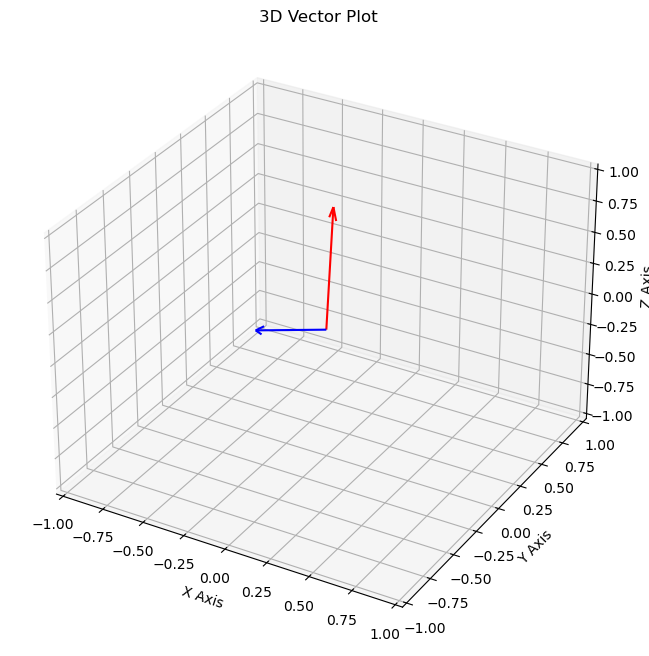

In [39]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2, color='b', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Find Orthogonal Basis

In [40]:
p = projection(datum_2, datum_1)

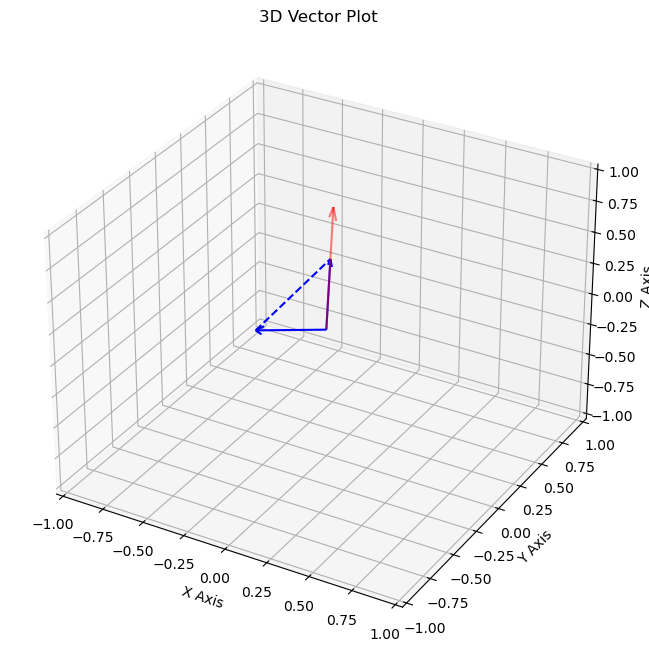

In [42]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='r', arrow_length_ratio=0.1, alpha=0.5)
ax.quiver(0, 0, 0, *datum_2, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p, color='b', arrow_length_ratio=0.1)

ax.plot3D(*zip(datum_2, p), color="b", linestyle='dashed')


# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

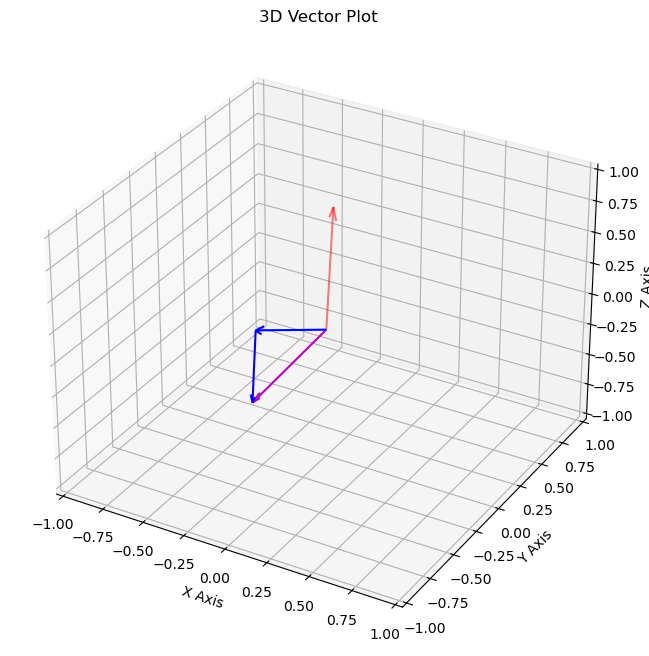

In [43]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='r', arrow_length_ratio=0.1, alpha=0.5)
ax.quiver(0, 0, 0, *datum_2, color='b', arrow_length_ratio=0.1)
ax.quiver(*datum_2, *-p, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *(datum_2-p), color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [46]:
datum_1_basis = datum_1
datum_2_basis = gram_schmidt(datum_1, datum_2)

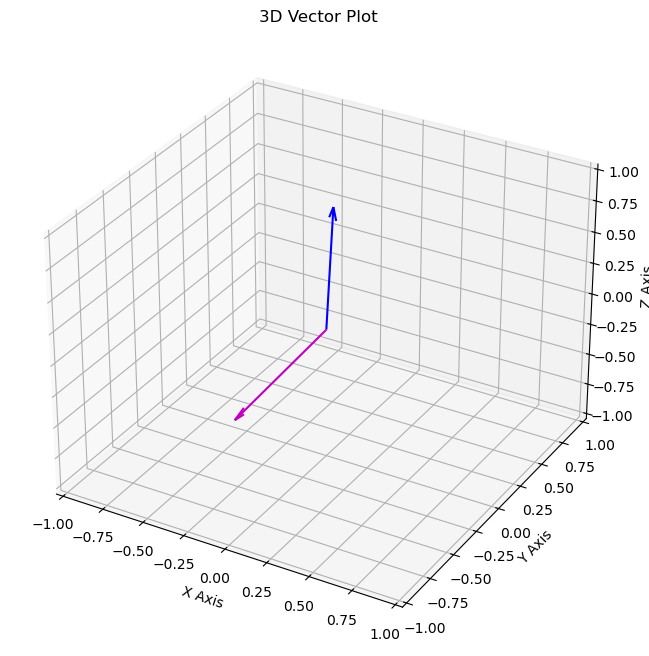

In [47]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2_basis, color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Get more data

In [49]:
vec = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    vec.append(entry)
    
vec = np.mean(vec, axis=0)

100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


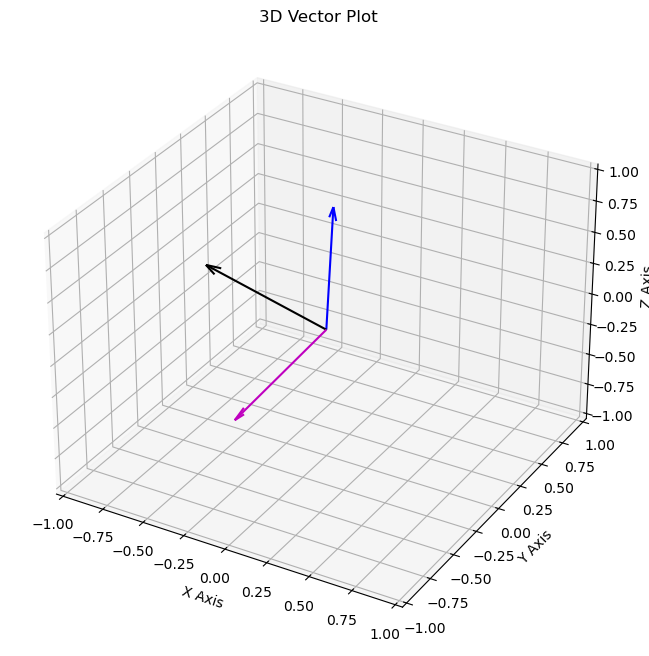

In [50]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2_basis, color='m', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *vec, color='k', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [51]:
p1 = projection(vec, datum_1_basis)
p2 = projection(vec, datum_2_basis)

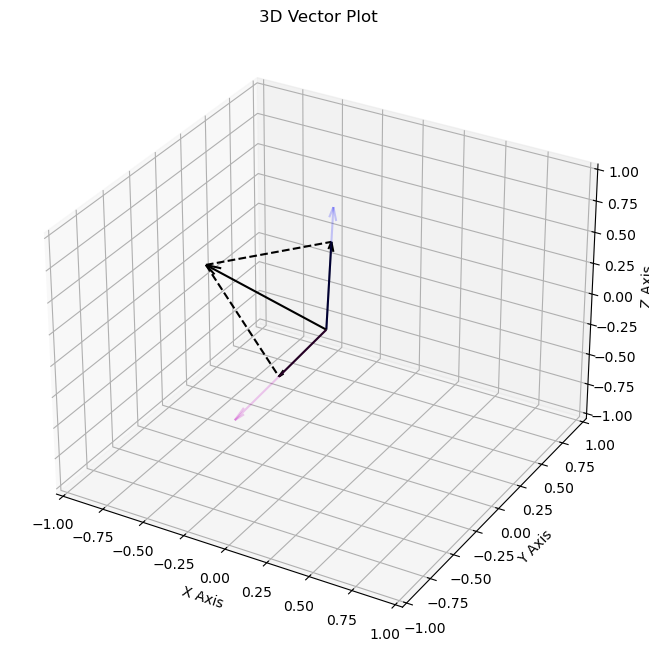

In [52]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *datum_2_basis, color='m', arrow_length_ratio=0.1, alpha=0.2)

ax.quiver(0, 0, 0, *vec, color='k', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p1, color='k', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p2, color='k', arrow_length_ratio=0.1)

ax.plot3D(*zip(vec, p1), color="k", linestyle='dashed')
ax.plot3D(*zip(vec, p2), color="k", linestyle='dashed')

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

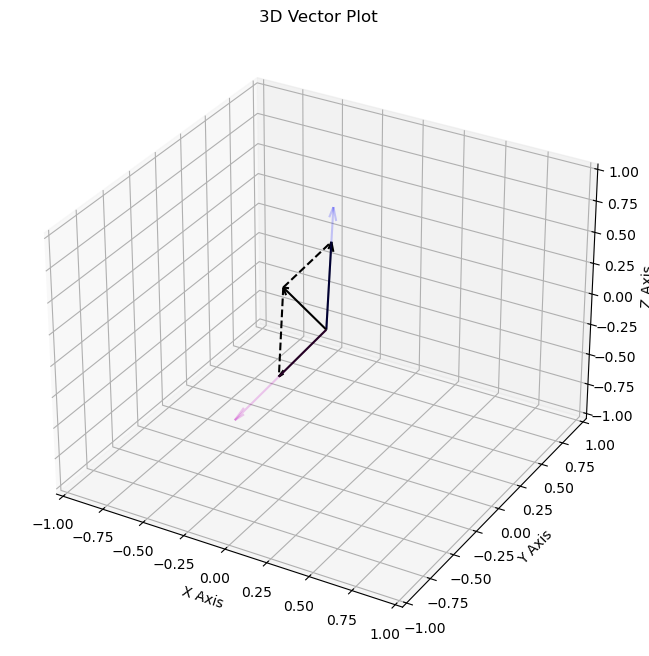

In [54]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *datum_2_basis, color='m', arrow_length_ratio=0.1, alpha=0.2)

ax.quiver(0, 0, 0, *(p1+p2), color='k', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p1, color='k', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p2, color='k', arrow_length_ratio=0.1)

ax.plot3D(*zip(p1+p2, p1), color="k", linestyle='dashed')
ax.plot3D(*zip(p1+p2, p2), color="k", linestyle='dashed')

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [56]:
for i in range(50):
    vec = get_unit_vector(get_accelerometer_data())
    vec_basis = get_unit_vector(projection(vec, datum_1_basis) + projection(vec, datum_2_basis))
    
    print(f"angle = {to_degree(get_angle_btwn_vecs(vec_basis, datum_1_basis))}")
    

angle = 12.511967880974927
angle = 12.293255101812509
angle = 13.146040418086463
angle = 0.10719026336479172
angle = 0.2545761875592313
angle = 0.4604977722918237
angle = 0.11747932561045628
angle = 0.2432634348295718
angle = 0.22053894035585897
angle = 0.3299389619010828
angle = 16.282581476448513
angle = 47.98131111498167
angle = 49.13313452157795
angle = 45.96030886151059
angle = 47.52980561382707
angle = 51.50647056557187
angle = 50.46121841231084
angle = 50.530356726113695
angle = 50.441418558365875
angle = 24.80716621499547
angle = 0.6515163246403516
angle = 0.6617163082872829
angle = 1.8754384271004911
angle = 0.5288072692478423
angle = 1.5661589836527632
angle = 0.5894758704975127
angle = 1.3942451485193212
angle = 0.3450386038041977
angle = 0.08565632724605617
angle = 0.040498347706763985
angle = 0.2756866949653826
angle = 0.036322525865915806
angle = 0.4173319113319693
angle = 0.541078746940826
angle = 0.272882460373875
angle = 0.8219424181448605
angle = 2.5432965670111534
an

In [57]:
for i in range(50):
    vec = get_unit_vector(get_accelerometer_data())
    vec_basis = get_unit_vector(projection(vec, datum_1_basis) + projection(vec, datum_2_basis))
    
    print(f"angle = {to_degree(get_angle_btwn_vecs(vec_basis, datum_1_basis)) * np.sign(np.dot(vec_basis, datum_2_basis))}")

angle = 0.6225249807036466
angle = -0.05163577891048859
angle = 0.16112909747525864
angle = 0.24262188026455367
angle = -0.18997235585670508
angle = -0.37684099418063854
angle = 6.020217479982676
angle = 30.78873955436673
angle = 55.34820215344026
angle = 52.386753063337565
angle = 54.49294247838249
angle = 56.28415179425652
angle = 39.604090284771374
angle = 16.52593838672482
angle = -23.391837097934793
angle = -57.47160828180978
angle = -59.91758174341633
angle = -52.99135277716715
angle = -54.0710433749231
angle = -50.27700101869611
angle = -54.597008644206966
angle = -53.0185852111879
angle = -9.479505000819636
angle = 25.1335119841922
angle = -5.163228976251735
angle = -22.032710977779633
angle = -22.993251283169474
angle = -3.7725093644449634
angle = 12.091246255745071
angle = 9.184243569473532
angle = 13.877688482334948
angle = 8.157231470280957
angle = -3.6598633928824724
angle = 0.03564652365360033
angle = 1.2272535614047204
angle = -1.427237832838809
angle = 1.441940772287206